In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from collections import defaultdict
import json
from scipy.stats import norm
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../../data/2019/2019_mod.csv')

In [13]:
se = pd.read_csv('../../data/2019/19_start_end_dt.csv')
se = [(datetime.strptime(row.Start, '%Y-%m-%d %H:%M:%S.%f'), datetime.strptime(row.End, '%Y-%m-%d %H:%M:%S.%f')) for index,row in se.iterrows()]

def checkGreen(time):
    t = datetime.strptime(time, '%Y-%m-%d %H:%M:%S.%f')
    for interval in se:
        if t > interval[0] and t < interval[1] + timedelta(minutes=2):
            return False
            
    return True

In [16]:
# drivers = df['Driver'].unique()
# lap_var = defaultdict(list)
# drivers[0]

In [17]:
df['SDT'] = pd.to_datetime(df['Session Time'], format='%Y-%m-%d %H:%M:%S.%f')
LapDT = pd.to_datetime(df['Lap Time'], format='%M:%S.%f')
df['LTS'] = [(t - datetime(1900, 1, 1)).total_seconds() for t in LapDT]
df

,Car,Class,Driver,Lap,Lap Time,Session Time,Flag,Location,S01,S02,...,S05,S06,S07,S08,S09,S10,S11,SP3,SDT,LTS
0,77,DPi,Oliver Jarvis,1,2:08.813,1900-01-01 00:02:08.813000,Yellow,Track,3.351,8.710,...,0.448,12.575,29.237,22.037,25.501,7.899,4.634,183.391,1900-01-01 00:02:08.813,128.813
1,7,DPi,Ricky Taylor,1,2:10.674,1900-01-01 00:02:10.674000,Yellow,Track,3.274,8.857,...,0.444,12.903,29.684,21.345,26.707,7.899,4.749,185.043,1900-01-01 00:02:10.674,130.674
2,55,DPi,Harry Tincknell,1,2:11.466,1900-01-01 00:02:11.466000,Yellow,Track,3.279,9.099,...,0.439,13.273,29.701,21.692,27.061,7.539,4.786,187.151,1900-01-01 00:02:11.466,131.466
3,10,DPi,Renger Van Der Zande,1,2:12.228,1900-01-01 00:02:12.228000,Yellow,Track,3.316,8.948,...,0.443,13.195,30.979,22.856,25.630,7.088,4.629,185.461,1900-01-01 00:02:12.228,132.228
4,31,DPi,Felipe Nasr,1,2:15.740,1900-01-01 00:02:15.740000,Yellow,Track,3.308,8.683,...,0.444,13.505,32.222,22.163,27.682,7.293,4.958,185.043,1900-01-01 00:02:15.740,135.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,85,DPi,Juan Piedrahita,199,1:35.407,1900-01-01 06:01:29.737000,Finish,Track,3.021,7.815,...,0.462,12.252,19.825,13.100,16.009,5.266,3.083,177.834,1900-01-01 06:01:29.737,95.407
6297,50,DPi,Will Owen,206,1:36.497,1900-01-01 06:01:42.462000,Finish,Track,2.995,7.697,...,0.455,12.796,19.985,12.926,16.548,5.382,3.118,180.569,1900-01-01 06:01:42.462,96.497
6298,911,GTLM,Nick Tandy,195,1:42.235,1900-01-01 06:01:48.448000,Finish,Track,3.232,8.454,...,0.492,13.169,21.115,13.904,17.068,5.517,3.323,166.990,1900-01-01 06:01:48.448,102.235
6299,3,GTLM,Antonio Garcia,195,1:42.017,1900-01-01 06:01:48.900000,Finish,Track,3.188,8.466,...,0.479,13.282,21.123,13.927,17.023,5.553,3.291,171.522,1900-01-01 06:01:48.900,102.017


In [18]:
start_var_time = datetime(1900, 1, 1, 0, 10)
start_var_time

datetime.datetime(1900, 1, 1, 0, 10)

In [19]:
d = {}

In [20]:
for i in range(340):
    st = start_var_time + timedelta(minutes = i)
    et = start_var_time + timedelta(minutes = 10+i)
    
    temp = df[(df['SDT'] >= st) & (df['SDT'] <= et)]
    temp = temp[['Driver', 'LTS']].dropna()
    
    std_vals = temp.groupby('Driver').std()['LTS']
    std_vals = std_vals.dropna()
    d[i+10] = np.average(std_vals)

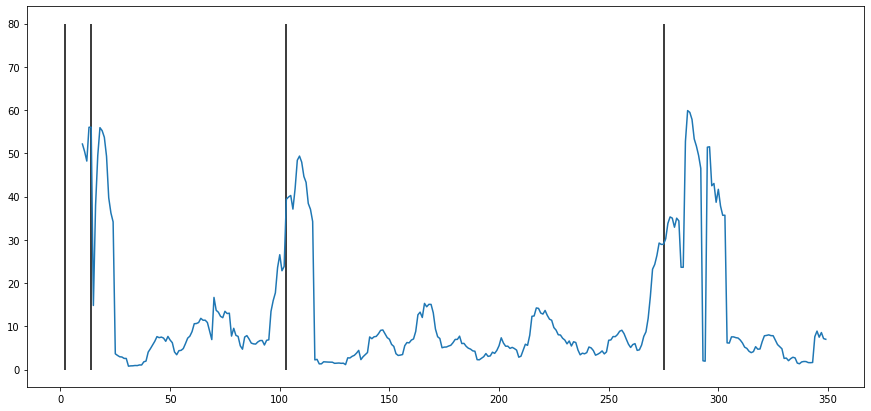

In [21]:
plt.figure(figsize=(15,7))
plt.plot(list(d.keys()), list(d.values()))
flagtimes = [120.0, 840.0, 6180.0, 16500.0]
flagtimes_m = [f // 60 for f in flagtimes]
plt.vlines(flagtimes_m, 0, 80)

In [7]:
for driver in drivers:
    temp = df[df['Driver'] == driver]
    
    for i in range(temp.shape[0]-2): 
        r1 = temp.iloc[i]
        r2 = temp.iloc[i+1]
        r3 = temp.iloc[i+2]
        
        if checkGreen(r1['Session Time']) and checkGreen(r2['Session Time']) and checkGreen(r3['Session Time']):
            t1 = datetime.strptime(r1['Lap Time'], '%M:%S.%f')
            t1s = (t1 - datetime(1900, 1, 1)).total_seconds()
            t2 = datetime.strptime(r2['Lap Time'], '%M:%S.%f')
            t2s = (t2 - datetime(1900, 1, 1)).total_seconds()
            t3 = datetime.strptime(r3['Lap Time'], '%M:%S.%f')
            t3s = (t3 - datetime(1900, 1, 1)).total_seconds()
            
            times = [t1s, t2s, t3s]
            moving_var = np.array(times).var()
            
            lap_var[driver].append(moving_var)
        else:
            lap_var[driver].append(-1)

In [7]:
lap_var_f = {driver: variances for driver, variances in lap_var.items() if len(variances) > 2}

In [8]:
with open('../../data/2021/21_lap_var.csv', 'w') as f:
    f.write('Driver,Var\n')
    for d, v in lap_var_f.items():
        f.write("%s,%s\n"%(d,v))